#Impoting Dependencies

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #converts text data to numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

#Data Collection and Preprocessing

In [75]:
#loading the dataset from csv file to a pandas dataframe
mail_data=pd.read_csv("/content/mail_data.csv")

In [76]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
#checking missing value
mail_data.isnull().sum()

,0
Category,0
Message,0


In [78]:
mail_data.shape

(5572, 2)

#Label Encoding

In [79]:
mail_data["Category"].value_counts()

,count
Category,
ham,4825
spam,747


In [80]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(mail_data.Category)

In [81]:
#appending labels to dataframe
mail_data["Category"]=labels

In [82]:
mail_data["Category"].value_counts()

,count
Category,
0,4825
1,747




*   0 --> ham
*   1 --> spam



#Handling Imbalanced Data

In [103]:
ham=mail_data[mail_data["Category"]==0]
spam=mail_data[mail_data["Category"]==1]

In [84]:
balanced_ham=ham.sample(n=len(spam))

In [85]:
balanced_mail_data=pd.concat([balanced_ham,spam],axis=0)

In [86]:
balanced_mail_data.head()

,Category,Message
4487,0,have * good weekend.
3930,0,Yes. Nigh you cant aha.
680,0,Missed your call cause I was yelling at scrapp...
5550,0,"Cool, what time you think you can get here?"
3210,0,Havent mus ask if u can 1st wat. Of meet 4 lun...


In [87]:
balanced_mail_data.shape

(1494, 2)

In [88]:
balanced_mail_data["Category"].value_counts()

,count
Category,
0,747
1,747


In [89]:
#Separate the category and message
X=balanced_mail_data["Message"]
Y=balanced_mail_data["Category"]

In [90]:
print(X)
print(Y)

4487                                 have * good weekend.
3930                              Yes. Nigh you cant aha.
680     Missed your call cause I was yelling at scrapp...
5550          Cool, what time you think you can get here?
3210    Havent mus ask if u can 1st wat. Of meet 4 lun...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 1494, dtype: object
4487    0
3930    0
680     0
5550    0
3210    0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: Category, Length: 1494, dtype: int64


#Train test split

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [92]:
print(X.shape,X_train.shape,X_test.shape)

(1494,) (1195,) (299,)


#Feature Extraction

In [93]:
#transform the text data to feature vector used as input to the logistic regresssion model
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
#convert Y_train and Y_test values as integers (not required but still for prevention)
Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

In [94]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12869 stored elements and shape (1195, 3714)>
  Coords	Values
  (0, 2326)	0.4332755327460019
  (0, 1167)	0.32490265384130695
  (0, 1146)	0.35125380108743426
  (0, 2751)	0.4409578005025626
  (0, 1960)	0.4409578005025626
  (0, 559)	0.4409578005025626
  (1, 3348)	0.17375797583511993
  (1, 3097)	0.1901247004066599
  (1, 1322)	0.16715046051855625
  (1, 754)	0.26097305391136666
  (1, 2306)	0.2761152355034283
  (1, 1894)	0.2502295050961047
  (1, 2631)	0.5219461078227333
  (1, 2003)	0.13697841385484777
  (1, 3053)	0.2761152355034283
  (1, 3478)	0.26097305391136666
  (1, 873)	0.26097305391136666
  (1, 3473)	0.12259376766662718
  (1, 1557)	0.2761152355034283
  (1, 859)	0.2761152355034283
  (1, 1738)	0.16615452910057507
  (2, 1752)	0.5408932587986518
  (2, 3489)	0.24509232931720173
  (2, 2909)	0.25561531461925197
  (2, 2104)	0.16681186994773287
  :	:
  (1193, 2435)	0.3158048917805026
  (1193, 254)	0.3341285269119129
  (1193, 1200)	0.33

In [95]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2739 stored elements and shape (299, 3714)>
  Coords	Values
  (0, 257)	0.2928473947614512
  (0, 484)	0.39934220836804163
  (0, 1713)	0.435734403752688
  (0, 2130)	0.435734403752688
  (0, 2425)	0.33792322744715303
  (0, 2789)	0.39934220836804163
  (0, 3286)	0.23621683424711726
  (0, 3473)	0.21347731250756052
  (1, 567)	0.24827267840840303
  (1, 1062)	0.3092830732963794
  (1, 1185)	0.2327415921032535
  (1, 1466)	0.2989830800823774
  (1, 1646)	0.144844663311553
  (1, 1791)	0.32256207408574555
  (1, 2136)	0.2989830800823774
  (1, 2280)	0.21476444496584862
  (1, 2324)	0.22854246247272578
  (1, 2455)	0.19966075612908366
  (1, 2602)	0.2772883720647091
  (1, 2629)	0.2772883720647091
  (1, 3126)	0.32256207408574555
  (1, 3355)	0.20916259809988536
  (1, 3419)	0.14824020818957154
  (1, 3473)	0.15152560532921341
  (2, 1083)	0.44149901535982367
  :	:
  (295, 3694)	0.23645561395916112
  (296, 1021)	0.3710371345537861
  (296, 2256)	0.44673

#Model Training

In [96]:
model=LogisticRegression()

In [97]:
#training the logistic regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

#Model Evaluation

In [98]:
#prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)
print(accuracy_on_training_data)

0.9857740585774059


In [99]:
#prediction on testing data
prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(Y_test,prediction_on_testing_data)
print(accuracy_on_testing_data)

0.959866220735786


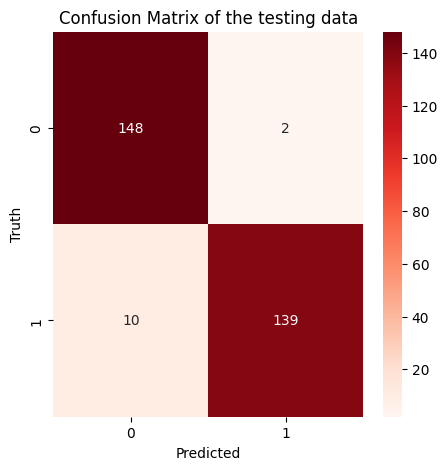

In [100]:
#confusion matrix of testing data
cm=confusion_matrix(Y_test,prediction_on_testing_data)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",annot_kws={"size":10},cmap="Reds")
plt.title("Confusion Matrix of the testing data")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [101]:
#manual testing
input_mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
#convert the text to feature vectors
input_mail_features=feature_extraction.transform(input_mail)
#making predictions
prediction=model.predict(input_mail_features)
if prediction[0]==1:
  print("Spam mail")
else:
  print("Ham mail")


Spam mail
